# Effect of Population Ageing  and Economic Strength in the Consequence of Covid19
## by Tuan Bui

## Investigation Overview

In this investigation, we wanted to know:
1. Does economic strength play any role in preventing the consequence of Covid19? We will use gdp per capita to explore this question.

2. Does population ageing affect the consequence of Covid19?

## Dataset Overview

The main Covid19 dataset comes from Our World in Data. Supporting data on number of nurses, gdp and gdp growth rate come from World bank. The final dataset consists of 18417 observations with 25 features in which most of them are numeric variables. Some interesting features are: total_cases_per_million, total_deaths_per_million, gdp_per_capita,
number_of_nurses, hospital_beds_per_100k,...

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('covid19_master.csv')
df.date = pd.to_datetime(df.date)
# data wrangling: extract subdataset from the master dataset
world = df[df.location=='World']
country = df[df.country_code.str.len()==3]
columns_to_keep = ['country_code','location','population_density','aged_65_older','gdp_per_capita','gdp','diabetes_prevalence','hospital_beds_per_100k','number_of_nurses','gdp_growth_rate','continent','sub_region']
country_total = country.groupby(columns_to_keep).agg({'total_cases_per_million':'max','total_deaths_per_million':'max'}).reset_index()
continent_ts = country.groupby(['continent','date']).agg({'total_cases_per_million':'mean','total_deaths_per_million':'mean'}).reset_index()

## The spread of Covid19 pandemic

Covid19 pandemic first appeared around December 2019 in Wuhan, China and soon spread globally with high number of positive cases and number of deaths. 

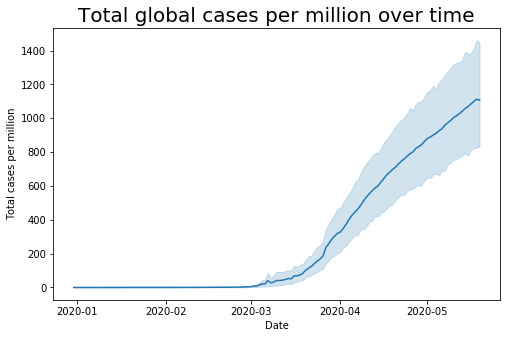

In [3]:
# plot global average of total cases per million with confidence interval
plt.figure(figsize=(8,5))
ax = sb.lineplot(data=country,x='date',y='total_cases_per_million')
plt.xlabel("Date")
plt.ylabel('Total cases per million');
plt.title("Total global cases per million over time",fontsize = 20);

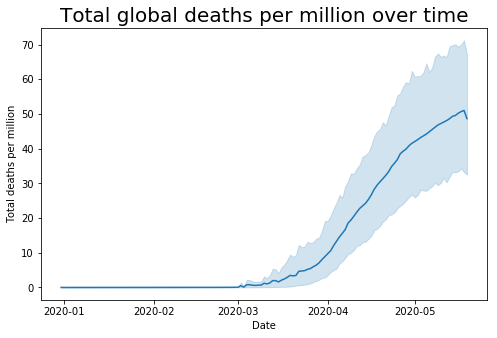

In [4]:
# plot global average of total deaths per million with confidence interval
plt.figure(figsize=(8,5))
ax = sb.lineplot(data=country,x='date',y='total_deaths_per_million')
plt.xlabel("Date")
plt.ylabel('Total deaths per million');
plt.title("Total global deaths per million over time",fontsize = 20);

## Features behavior

The behavior of the number of cases per million and the number of deaths are quite similar. They increasing very fast over time and there are wide gaps between the highest and lowest. Deaths per million seems to slow down a bit since the beginning of May. This suggests that it might be because of the hospital facilities and the economics of the country. The features *gdp*, *hospital_beds_per_100k*, *number_of_nurses* may help understand this observation.

## Features vary against continent

Before going to investigate the above features, we first look at how number of cases vary continent by continent.

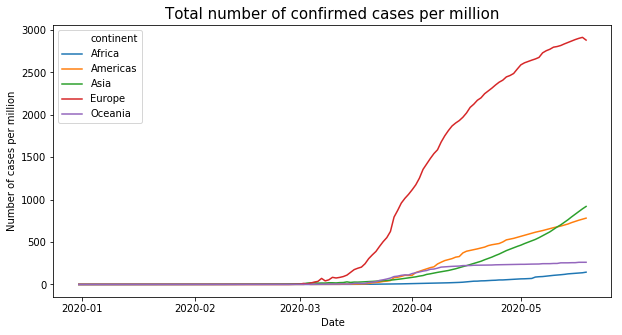

In [5]:
plt.figure(figsize=(10,5))
sb.lineplot(data=continent_ts,x='date',y='total_cases_per_million',hue='continent')
plt.xlabel("Date")
plt.ylabel("Number of cases per million")
plt.title("Total number of confirmed cases per million",fontsize=15);

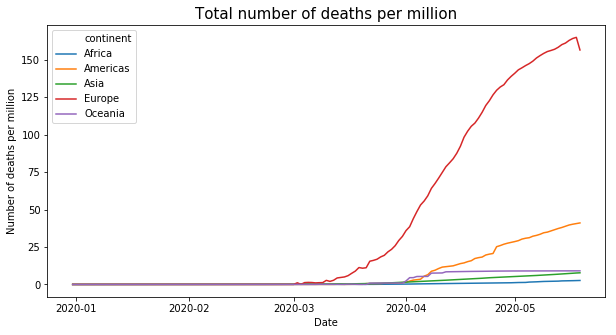

In [6]:
plt.figure(figsize=(10,5))
sb.lineplot(data=continent_ts,x='date',y='total_deaths_per_million',hue='continent')
plt.xlabel("Date")
plt.ylabel("Number of deaths per million")
plt.title("Total number of deaths per million",fontsize=15);

## How gdp per capita affect number of cases

We observe that higher gdp per capita higher the number of cases per million. But this might be because the richer countries have more tests so that they found more positive cases. Since we don't have data of the tests in each country, we can't explain this relationship and this is remaining a hypothesis.

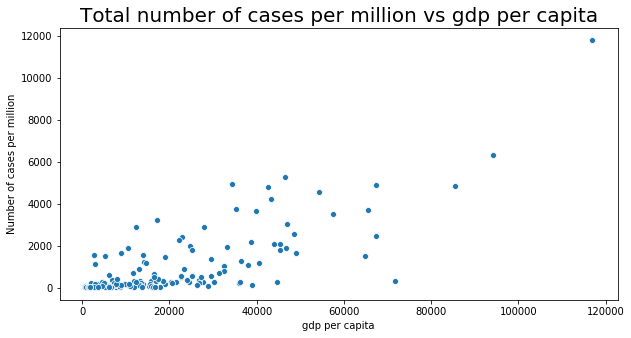

In [7]:
plt.figure(figsize=(10,5))
ax = sb.scatterplot(data=country_total,x='gdp_per_capita',y='total_cases_per_million')
plt.title("Total number of cases per million vs gdp per capita",fontsize=20)
plt.xlabel("gdp per capita")
plt.ylabel("Number of cases per million");

## Cases vs Deaths: the effect of population ageing
Total cases per million and total deaths per million are highly correlated as expected, except for some countries have extremely high death rate and this happens because of the population ageing.

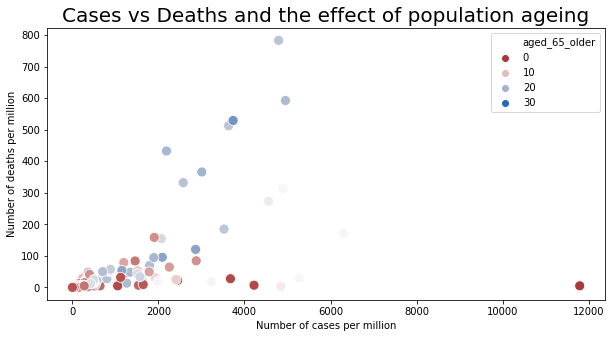

In [8]:
plt.figure(figsize=(10,5))
eu = country_total[country_total.continent=='Europe']
ax = sb.scatterplot(data=country_total,x='total_cases_per_million',y='total_deaths_per_million',hue='aged_65_older',palette='vlag_r',s= 100)
plt.xlabel("Number of cases per million")
plt.ylabel("Number of deaths per million")
plt.title("Cases vs Deaths and the effect of population ageing",fontsize=20);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!